# Linear Regression Tutorial
https://gist.github.com/cjtu/78dafb62cb029b84417399823a892237


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

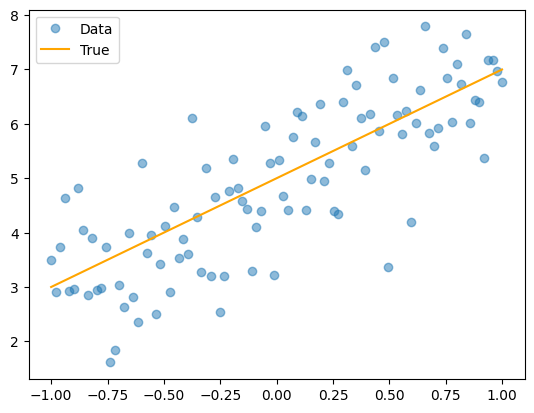

In [2]:
# Simulate a linear relationship y = mx + b
m = 2  # Slope
b = 5  # y-intercept
X = np.linspace(-1, 1, 100)  # X values
y_ideal = m * X + b  # the perfect line, y=m*X+b

# Add some Gaussian noise to simulate random observations
random_seed = np.random.seed(42)  # comment this out to randomize each time
noise = np.random.normal(0, 1, 100)  # Gaussian(mean, stdev, npts)
y = y_ideal + noise

# Visualize the simulated observations
plt.plot(X, y, 'o', alpha=0.5, label="Data")
plt.plot(X, y_ideal, color="orange", label="True")
plt.legend()

In [3]:
X_ols = sm.add_constant(X)
m = sm.OLS(y, X_ols)
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.56e-23
Time:                        16:45:56   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8962      0.091     53.693      0.0

In [6]:
pred = r.get_prediction()
conf_low, conf_upp = pred.conf_int(alpha=0.05, obs=True).T
pred_low, pred_upp = pred.conf_int(alpha=0.05, obs=False).T


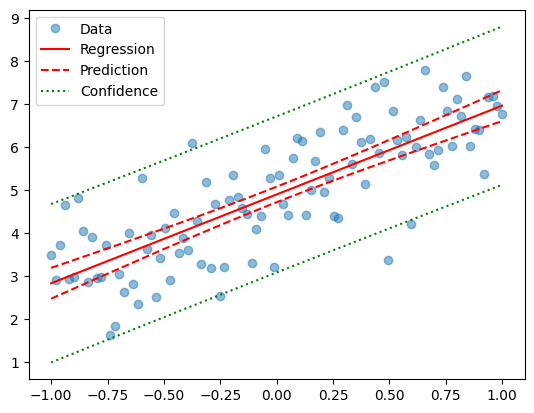

In [17]:
plt.plot(X, y, 'o', alpha=0.5, label="Data")
#plt.plot(X, y_ideal, color="orange", label="True")
plt.plot(X, r.fittedvalues, "r", label="Regression")
plt.plot(X, pred_low, "r--", label="Prediction")
plt.plot(X, pred_upp, "r--")
plt.plot(X, conf_low, "g:", label="Confidence")
plt.plot(X, conf_upp, "g:")
plt.legend()
plt.show()